# Assignment 1

### By Aryan Gupta(EE)

### Question 1:
You are doing full batch gradient descent using the entire training set (not stochastic gradient descent), Is it necessary to shuffle the training data? Explain your answer.

Ans1: In a full batch gradient descent, the cost function runs through the entire dataset and finds the value(like how I have implemented in question2) and then find the value of parameters. So even of you shuffle the values of a particular instance then all the corresponding values of xij(x1j, x2j, x3j...) are shifted with yj and for calculating cost function, there no net change in the value of gradient descent parameters. So the shuffling the values of the gradient descent dataset does not matter.

### Question 2: 
Implement Gradient Descent in a Jupyter Notebook. Also explain in the same file how tuning each hyperparameter changes the outcome?

Ans2:

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Now we need to implement the gradient descent algorithm
# assuming my function to be of form h(x)= b_0 + b_1*x and solution be of form (x,y)
def cost_function(b_0, b_1, x, y)->float:
    n = np.size(x)
    J = (1/(2*n))*(np.sum((b_0 + b_1*x -y)**2))
    return J
# cost list to store the value of costs obtained
costs = []
def gradient_descent(x, y, b_0, b_1,learning_rate = 0.001,
    stopping_threshold = 1e-6,
    iterations_max = 1000)->(float, float):
    learning_rate = learning_rate
    stopping_threshold = stopping_threshold
    n = np.size(x)
    for i in range(iterations_max):
        # main gradient descent algorithm(as described in Andrew Ng course)
        temp0 = b_0 - (learning_rate*np.sum((b_0 + b_1*x -y)/n))
        temp1 = b_1 - (learning_rate*np.sum(((b_0 + b_1*x -y)*x)/n)) # this is derivative of J
        J = cost_function(b_0, b_1,x,y)
        #simultaneous upgrade of coefficients
        b_0 = temp0
        b_1 = temp1
        J_new = cost_function(b_0, b_1, x, y)
        costs.append(J_new)
        if abs(J_new - J) < stopping_threshold:
            break
    return b_0, b_1

In [52]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
b= np.random.randn(2,1) #to generate random coefficients (maybe of mean=0 and variance=1)
iterations_max=1000
b = gradient_descent(x, y, b[0],b[1],learning_rate=0.02, iterations_max =iterations_max)
print(f"Estimated coefficients:\nb_0 = {b[0]} \nb_1 = {b[1]}")

Estimated coefficients:
b_0 = [1.21174477] 
b_1 = [1.17362306]


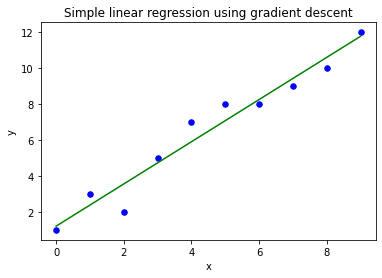

In [53]:
# Plotting the function obtained using gradient descent v/s scattered x-y data
def plot_func(x, y, b):
    plt.scatter(x,y, color="b", marker="o", s=30)
    y_predict = b[0]+ b[1]*x
    plt.plot(x,y_predict,color="g")
    plt.title("Simple linear regression using gradient descent")
    plt.xlabel("x")
    plt.ylabel("y")
plot_func(x, y, b)

Text(0.5, 1.0, 'Cost vs Iterations Analysis')

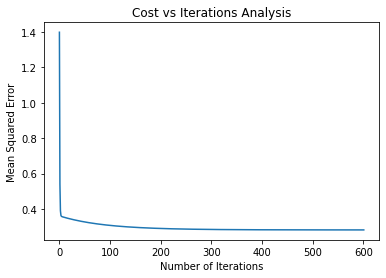

In [54]:
# plotting the values of costs v/s number of iterations
N = [i for i in range(len(costs))]
plt.plot(N,costs)
plt.xlabel('Number of Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost vs Iterations Analysis')

In [55]:
# calculating RSS( Residual Sum of Squares):
def residual_sum_of_squares(input_features, output_features, slope, intercept):
    prediction = input_features*slope + intercept
    residual = output_features - prediction
    RSS = np.sum(residual*residual)
    return RSS
print(residual_sum_of_squares(x,y,b[0],b[1]))

5.930061847701175


In [56]:
def mean_sum_of_squares(input_features, output_features, slope, intercept):
    prediction = input_features*slope + intercept
    residual = output_features - prediction
    MSE = np.sum(residual*residual)/len(y)
    return MSE
print(mean_sum_of_squares(x,y,b[0],b[1]))

0.5930061847701176


Estimated coefficients:
b_0 = [1.2118838] 
b_1 = [1.17360089]   RSS:5.932558103798312  MSE:0.5932558103798312
Estimated coefficients:
b_0 = [1.21914957] 
b_1 = [1.17244218]   RSS:6.077589130039683  MSE:0.6077589130039682
Estimated coefficients:
b_0 = [1.21914962] 
b_1 = [1.17244217]   RSS:6.077590195934423  MSE:0.6077590195934424
Estimated coefficients:
b_0 = [1.21915011] 
b_1 = [1.17244209]   RSS:6.0776008549221485  MSE:0.6077600854922148
Estimated coefficients:
b_0 = [1.21915497] 
b_1 = [1.17244132]   RSS:6.0777074488295595  MSE:0.6077707448829559
Estimated coefficients:
b_0 = [1.21920356] 
b_1 = [1.17243357]   RSS:6.078773790523995  MSE:0.6078773790523995
Estimated coefficients:
b_0 = [1.22581855] 
b_1 = [1.17137864]   RSS:6.235882549870269  MSE:0.6235882549870269


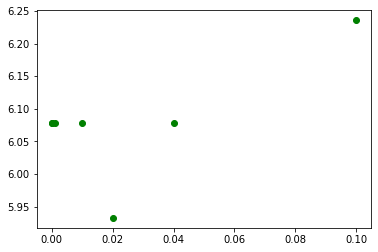

In [57]:
# now I will try various values of leaning rate and find out the best possible fit using the curve
learning_rate_values = [0.02, 0.04,0.00001,0.0001, 0.001,0.01, 0.1]
RSS_error_values = []
MSE_error_values = []
for i in range(len(learning_rate_values)):
    iterations_max=1000
    b = gradient_descent(x, y, b[0],b[1],learning_rate=learning_rate_values[i], iterations_max =iterations_max)
    print(f"Estimated coefficients:\nb_0 = {b[0]} \nb_1 = {b[1]}",f"  RSS:{residual_sum_of_squares(x,y,b[0],b[1])}", f" MSE:{mean_sum_of_squares(x,y,b[0],b[1])}")
    RSS_error_values.append(residual_sum_of_squares(x,y,b[0],b[1]))
    MSE_error_values.append(mean_sum_of_squares(x,y,b[0],b[1]))

plt.scatter(learning_rate_values, RSS_error_values, color='g')

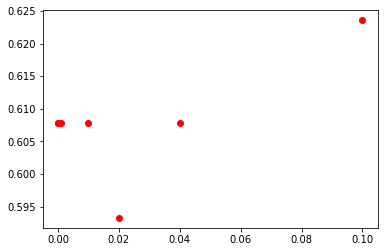

In [58]:
plt.scatter(learning_rate_values, MSE_error_values, color='r')
# so we can see that as the value of learning rate is changed, the error values gets changed

The above table value shows that we can reduce the Residual sum of squares(RSS) error and Mean Sum of Squares(MSE)error by changing the values of learning rate which can affect the ability to reach the minimum of the cost function depending upon whether the leanining rate value is quite less(in which case the number of iterations is quite high) or quite high(in which the value overshoots and do not reach the required value).

### Question 3:

Go through first 2 chapters of ISLR. Now, explain Bias-Variance tradeoff in detail.

Answer 3:

In [ ]:
$E(y0 − f(x0))**2 = Var(f(x0)) + [Bias(f(x0))**2] + Var(ε).$

This equation is central in understanding the concept of Bais-Variance tradeoff. 
The first term represents the error function E that explains the MSE or 